Load the necessary python libraries for cleaning and exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import pickle
import re
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'

Create a dataframe, "data", of the radar and satelite data from the UCI machine learning library.

In [2]:
raw_data = pd.read_csv('WinnipegDataset.txt')

Explore the characteristics of the dataset.

In [3]:
raw_data.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [4]:
raw_data.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.00000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,-15.143602,-24.026035,-15.400034,-18.59383,-14.493472,-18.427329,0.256432,-8.882434,-8.626002,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,3.504255,4.054214,3.267857,3.71163,3.189013,3.675741,1.682060,1.204040,2.002658,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,-23.971000,-34.308000,-23.161000,-27.24500,-22.103000,-26.897000,-5.582600,-16.389000,-16.558000,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,-17.848000,-27.119000,-17.563000,-21.44900,-16.989000,-21.450000,-1.037800,-9.658500,-10.070000,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,0.000000,0.506170,0.357140
50%,4.000000,-15.992000,-25.064000,-16.164000,-19.58800,-15.099000,-19.282000,0.309180,-8.915900,-8.733100,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,-11.786000,-20.387000,-13.427000,-15.65000,-11.735000,-15.514000,1.558200,-8.190200,-7.158100,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,2.535600,-7.589100,1.104000,0.77491,-0.887390,0.951780,7.029900,-1.175400,-0.924610,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


Cannot tell if there are missing values from .info(). Create a list of dataframe column names and run those names through a for loop to filter and check each column individually for missing/null values.

In [6]:
cols = list(raw_data.columns)

In [7]:
for col in cols:
    null_vals = []
    if raw_data[col].notnull().count() < 325834:
        null_vals.append(col)

print(null_vals)

[]


There are no null values, however the column names are not the names of the features. Scrape the actual feature names from UCI webpage and set them equal to the column names.

In [8]:
url = 'http://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set'

In [9]:
r = requests.get(url)

In [10]:
html_doc = r.text

In [11]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [12]:
soup


<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.01 Transitional//EN\">

<html>
<head>
<title>UCI Machine Learning Repository: Crop mapping using fused optical-radar data set Data Set</title>
<!-- Stylesheet link -->
<link href="../assets/ml.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" type="text/javascript">
<!--
function checkform ( form )
{
  // see http://www.thesitewizard.com/archive/validation.shtml
  // for an explanation of this script and how to use it on your
  // own website

  // ** START **
  if (form.q.value == "")
  {
    alert( "Please enter search terms." );
    form.q.focus();
    return false ;
  }

  if (getCheckedValue(form.sitesearch) == "ics.uci.edu" && form.q.value.indexOf("site:archive.ics.uci.edu/ml") == -1)
  {
    form.q.value = form.q.value + " site:archive.ics.uci.edu/ml";
  }

  // ** END **
  return true ;
}

// return the value of the radio button that is checked
// return an empty string if none are checked, or
// there are no radio

In [13]:
features = soup.find_all('p', class_='normal')[21]

In [14]:
features

<p class="normal">175 attributes including:
<br/>      1- class;
<br/>      2- f1 to f49:Polarimetric features on 05 July 2012;
<br/>      3- f50 to f98:Polarimetric features on 14 July 2012;
<br/>      4- f99 to f136:Optical features on 05 July 2012;
<br/>      5- f137 to f174:Optical features on 14 July 2012;
<br/> <br/>Details:
<br/>label:crop type class
<br/>f1:sigHH_Rad05July
<br/>f2:sigHV_Rad05July
<br/>f3:sigVV_Rad05July
<br/>f4:sigRR_Rad05July
<br/>f5:sigRL_Rad05July
<br/>f6:sigLL_Rad05July
<br/>f7:Rhhvv_Rad05July
<br/>f8:Rhvhh_Rad05July
<br/>f9:Rhvvv_Rad05July
<br/>f10:Rrrll_Rad05July
<br/>f11:Rrlrr_Rad05July
<br/>f12:Rrlll_Rad05July
<br/>f13:Rhh_Rad05July
<br/>f14:Rhv_Rad05July
<br/>f15:Rvv_Rad05July
<br/>f16:Rrr_Rad05July
<br/>f17:Rrl_Rad05July
<br/>f18:Rll_Rad05July
<br/>f19:Ro12_Rad05July
<br/>f20:Ro13_Rad05July
<br/>f21:Ro23_Rad05July
<br/>f22:Ro12cir_Rad05July
<br/>f23:Ro13cir_Rad05July
<br/>f24:Ro23cir_Rad05July
<br/>f25:l1_Rad05July
<br/>f26:l2_Rad05July
<br/>f27:l3_Ra

In [15]:
features.get_text()

'175 attributes including:\r      1- class;\r      2- f1 to f49:Polarimetric features on 05 July 2012;\r      3- f50 to f98:Polarimetric features on 14 July 2012;\r      4- f99 to f136:Optical features on 05 July 2012;\r      5- f137 to f174:Optical features on 14 July 2012;\r Details:\rlabel:crop type class\rf1:sigHH_Rad05July\rf2:sigHV_Rad05July\rf3:sigVV_Rad05July\rf4:sigRR_Rad05July\rf5:sigRL_Rad05July\rf6:sigLL_Rad05July\rf7:Rhhvv_Rad05July\rf8:Rhvhh_Rad05July\rf9:Rhvvv_Rad05July\rf10:Rrrll_Rad05July\rf11:Rrlrr_Rad05July\rf12:Rrlll_Rad05July\rf13:Rhh_Rad05July\rf14:Rhv_Rad05July\rf15:Rvv_Rad05July\rf16:Rrr_Rad05July\rf17:Rrl_Rad05July\rf18:Rll_Rad05July\rf19:Ro12_Rad05July\rf20:Ro13_Rad05July\rf21:Ro23_Rad05July\rf22:Ro12cir_Rad05July\rf23:Ro13cir_Rad05July\rf24:Ro23cir_Rad05July\rf25:l1_Rad05July\rf26:l2_Rad05July\rf27:l3_Rad05July\rf28:H_Rad05July\rf29:A_Rad05July\rf30:a_Rad05July\rf31:HA_Rad05July\rf32:H1mA_Rad05July\rf33:1mHA_Rad05July\rf34:1mH1mA_Rad05July\rf35:PH_Rad05July\r

In [16]:
features_list = re.split('\r', features.get_text())
features_list

['175 attributes including:',
 '      1- class;',
 '      2- f1 to f49:Polarimetric features on 05 July 2012;',
 '      3- f50 to f98:Polarimetric features on 14 July 2012;',
 '      4- f99 to f136:Optical features on 05 July 2012;',
 '      5- f137 to f174:Optical features on 14 July 2012;',
 ' Details:',
 'label:crop type class',
 'f1:sigHH_Rad05July',
 'f2:sigHV_Rad05July',
 'f3:sigVV_Rad05July',
 'f4:sigRR_Rad05July',
 'f5:sigRL_Rad05July',
 'f6:sigLL_Rad05July',
 'f7:Rhhvv_Rad05July',
 'f8:Rhvhh_Rad05July',
 'f9:Rhvvv_Rad05July',
 'f10:Rrrll_Rad05July',
 'f11:Rrlrr_Rad05July',
 'f12:Rrlll_Rad05July',
 'f13:Rhh_Rad05July',
 'f14:Rhv_Rad05July',
 'f15:Rvv_Rad05July',
 'f16:Rrr_Rad05July',
 'f17:Rrl_Rad05July',
 'f18:Rll_Rad05July',
 'f19:Ro12_Rad05July',
 'f20:Ro13_Rad05July',
 'f21:Ro23_Rad05July',
 'f22:Ro12cir_Rad05July',
 'f23:Ro13cir_Rad05July',
 'f24:Ro23cir_Rad05July',
 'f25:l1_Rad05July',
 'f26:l2_Rad05July',
 'f27:l3_Rad05July',
 'f28:H_Rad05July',
 'f29:A_Rad05July',
 'f30

In [17]:
column_dict = {re.split(':', i)[0]:re.split(':',i)[1] for i in features_list[7:-1]}

In [18]:
column_dict['label'] = 'crop'

In [19]:
raw_data.columns = column_dict.values()

In [20]:
raw_data.head(1)

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.559,-21.407,-11.404,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.002,...,0.18519,0.72602,5.3333,6.0,0.29489,9.7778,2.4444,1.677,0.20988,0.65422


In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, crop to CorPC2_Opt14July
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


The data is now in a format that is ready for EDA. It can thus be saved as pickle file to avoid having to rerun the initial cleaning and processing steps.

In [22]:
def pickling_function(pickle_object):
    pickle_name = input('Provide a filename: ')
    with open(f'{pickle_name}', 'wb') as f:
        pickle.dump(pickle_object, f)

    pickle_in = open(f'{pickle_name}', 'rb')
    pickled = pickle.load(pickle_in)
    return pickled

In [23]:
data = pickling_function(raw_data)

In [24]:
data.head()

,crop,sigHH_Rad05July,sigHV_Rad05July,sigVV_Rad05July,sigRR_Rad05July,sigRL_Rad05July,sigLL_Rad05July,Rhhvv_Rad05July,Rhvhh_Rad05July,Rhvvv_Rad05July,...,SecMomPC1_Opt14July,CorPC1_Opt14July,MeanPC2_Opt14July,VarPC2_Opt14July,HomPC2_Opt14July,ConPC2_Opt14July,DisPC2_Opt14July,EntPC2_Opt14July,SecMomPC2_Opt14July,CorPC2_Opt14July
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


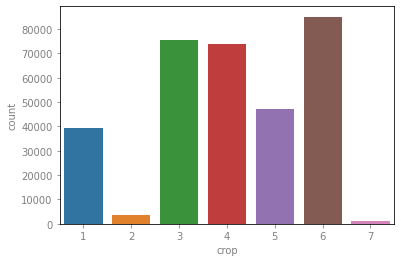

6    85074
3    75673
4    74067
5    47117
1    39162
2     3598
7     1143
Name: crop, dtype: int64


In [25]:
sns.countplot(x='crop', data=data)
plt.show()
print(data.crop.value_counts())

There is a significant amount of class imbalance in the dataset. This will be handled later using a synthetic growth technique.
Continue with exploration of the features to determine potential 

In [26]:
corrs = data.corr()    

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corrs, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
for i in range(1,12):
    if i == 1:
        start = i
        stop = i + 17
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[start:stop,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()
    elif i > 1  and i < 11:
        start = stop
        stop = start + 17
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[start:stop,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()
    else:
        var_range = corrs.sort_values(ascending=False, by='crop').iloc[171:175,:1]
        map_vars = target_variable.append(var_range)
        heatmap = corrs.sort_values(ascending=False, by='crop').loc[map_vars.index, map_vars.index]
        plt.figure(figsize=(20,10))
        sns.heatmap(heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
        plt.show()

In [43]:
top_positive_cor = corrs.sort_values(ascending=False, by='crop').iloc[:18,:1]
top_negative_cor = corrs.sort_values(ascending=False, by='crop').iloc[-17:,:1]
target_variable = corrs.sort_values(ascending=False, by='crop').iloc[:1,:1]
top_negative_cor = target_variable.append(top_negative_cor)

In [44]:
positive_heatmap = corrs.sort_values(ascending=False, by='crop').loc[top_positive_cor.index, top_positive_cor.index]
negative_heatmap = corrs.sort_values(ascending=False, by='crop').loc[top_negative_cor.index, top_negative_cor.index]

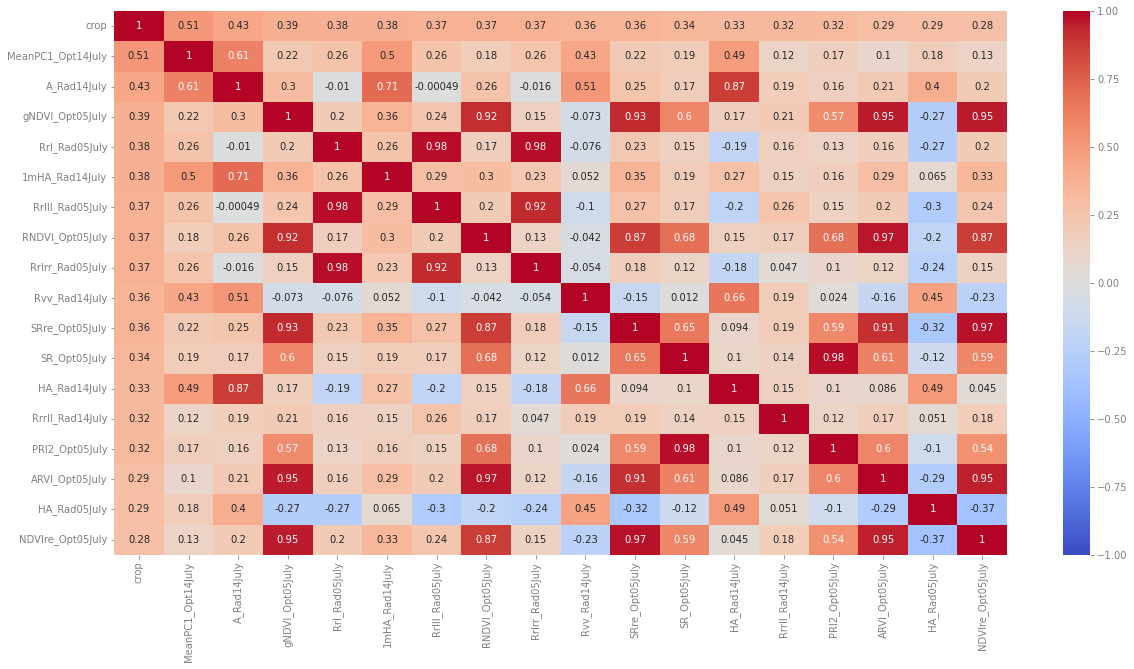

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(positive_heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

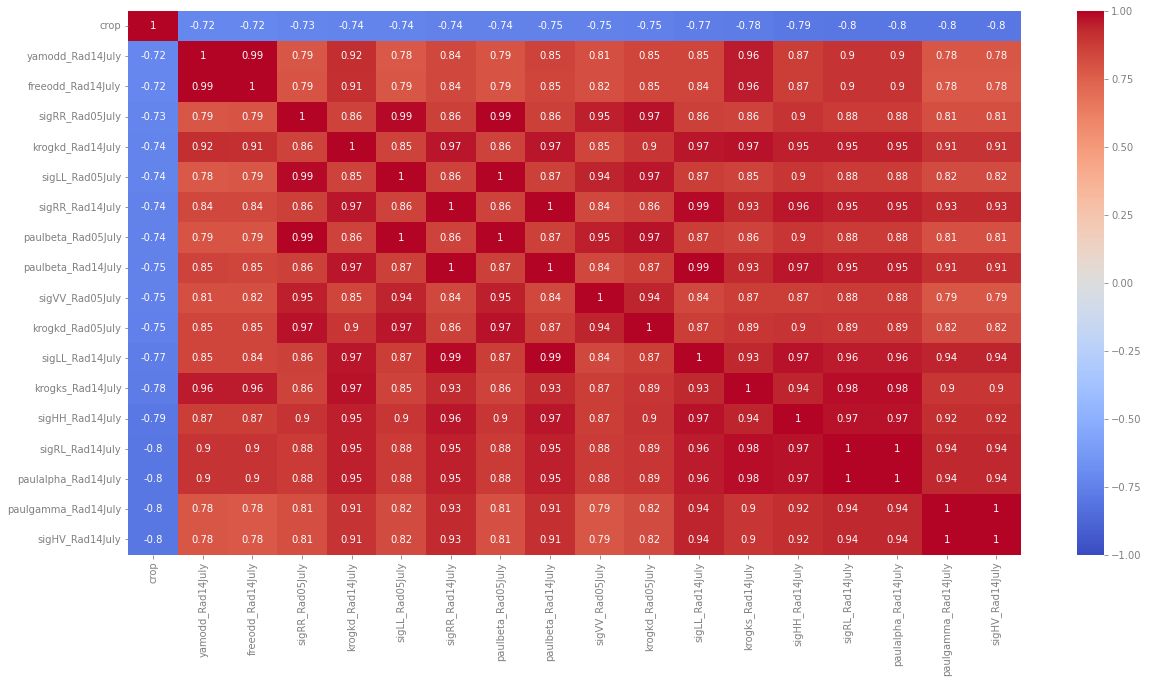

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(negative_heatmap, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

Create date filters so that data from each date may be split and EDA be performed on the observations by date taken.

In [33]:
july_5 = ['crop']
july_14 = ['crop']
for i in re.findall(r"\w+05July\b", str(list(data.columns))):
    july_5.append(i) 
for i in re.findall(r"\w+14July\b", str(list(data.columns))):
    july_14.append(i)

In [34]:
data[july_5].shape == data[july_14].shape

True

The data can now be filtered according to the date the observation was taken.

The data has both a high amount of observations and a large amount of features. PCA and Feature selection can be done to reduce the extreme dimensionality present in the data.